## Further Pandas: Data Wrangling and Visualization
Data Munging or Data Wrangling: i.e. cleaning and manipulating datasets so they are fit for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Set path to toy education outcomes dataset

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [3]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

In [4]:
# Examine first two observations

df.head(2)

,country_id,country,country_school_id,country_student_id,student_gender,computer_at_home,internet_at_home,immigration_status,early_education,repeated_grades,school_location,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,Argentina,3200001,3213049,Female,No,Yes,First-Generation,Attended ECEC for at least two but less than t...,Repeated a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,Argentina,3200001,3203374,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"


In [5]:
# Examine dataframe columns

df.columns

Index(['country_id', 'country', 'country_school_id', 'country_student_id',
       'student_gender', 'computer_at_home', 'internet_at_home',
       'immigration_status', 'early_education', 'repeated_grades',
       'school_location', 'school_type', 'school_size', 'class_size',
       'socioeconomic_index', 'math_score', 'reading_score',
       'parent_education'],
      dtype='object')

#### 1. Rename columns 

In [6]:
new_column_names = {"country_school_id" : "school_id",
                   "country_student_id" : "student_id"}

df = df.rename(columns=new_column_names)

In [7]:
# Lets's check the column names again. Notice that we have successfully renamed the two columns above:

df.columns

Index(['country_id', 'country', 'school_id', 'student_id', 'student_gender',
       'computer_at_home', 'internet_at_home', 'immigration_status',
       'early_education', 'repeated_grades', 'school_location', 'school_type',
       'school_size', 'class_size', 'socioeconomic_index', 'math_score',
       'reading_score', 'parent_education'],
      dtype='object')

#### 2. Drop columns

In [8]:
# The country_id column seems redundant, so let's drop it:

df.drop(columns=["country_id"], inplace=True)

In [9]:
df.columns

Index(['country', 'school_id', 'student_id', 'student_gender',
       'computer_at_home', 'internet_at_home', 'immigration_status',
       'early_education', 'repeated_grades', 'school_location', 'school_type',
       'school_size', 'class_size', 'socioeconomic_index', 'math_score',
       'reading_score', 'parent_education'],
      dtype='object')

In [10]:
# Alternately, we can also select columns to keep: 

df[["country", "math_score", "reading_score"]]

,country,math_score,reading_score
0,Argentina,314.25031,424.07239
1,Argentina,356.07629,380.26309
2,Argentina,338.08029,384.89191
3,Argentina,310.38690,392.88031
4,Argentina,397.42441,452.03439
5,Argentina,324.67340,359.64890
6,Argentina,384.48151,374.87259
7,Argentina,300.24149,342.33160
8,Argentina,456.25510,556.59320
9,Argentina,474.41980,524.93378


#### 3. Handle missing values

In [11]:
# Missing values for each column

df.isnull().sum()

country                   0
school_id                 0
student_id                0
student_gender            0
computer_at_home        432
internet_at_home        432
immigration_status        0
early_education           0
repeated_grades           0
school_location         886
school_type               0
school_size               0
class_size             1002
socioeconomic_index     833
math_score                0
reading_score             0
parent_education          0
dtype: int64

In [12]:
# But there are other values like "No Response" and "Invalid" that are not currently counted as None or Null: 

df.school_size.value_counts()

Invalid        11986
No Response     2222
322              176
392              170
350              157
640              151
613              141
652              136
914              135
409              131
557              131
529              129
417              128
360              128
290              127
457              122
352              122
431              120
830              117
221              117
171              117
550              110
651              107
700              107
162              105
815              105
960              102
957               99
1210              99
837               99
               ...  
1297               8
74                 7
45                 7
78                 7
130                7
104                7
177                7
56                 6
46                 6
107                6
661                6
50                 6
33                 5
1630               5
367                5
19                 5
4            

In [13]:
# # One way of re-assigning these values as None:

# df.school_size[(df.school_size == "No Response")|(df.school_size == "Invalid")] = None
# df.school_size.isna().sum()

In [14]:
# To assign all null equivalents as None:

# List of all columns
all_columns = df.columns.tolist()

# List of values that we want to re-assign as None: 
list_of_null_equivalents = ["No Response", "Invalid", np.nan, "None", "Non Response"]

# Treat all columns where null equivalents exist
for col in all_columns:
    df.loc[df[col].isin(list_of_null_equivalents),col] = None # Homework: Look up how you can select data with ".loc" and ".iloc"

In [15]:
# Many more columns have null values

df.isnull().sum()

country                    0
school_id                  0
student_id                 0
student_gender             0
computer_at_home        1121
internet_at_home        1051
immigration_status      9032
early_education        10733
repeated_grades        13513
school_location         6989
school_type             6820
school_size            14208
class_size              1834
socioeconomic_index      833
math_score                 0
reading_score              0
parent_education         413
dtype: int64

#### Decide what steps to take, eg:
* deduce the missing values (eg. internet_at_home from socioeconomic index)
* fill NaNs using mean, median or a custom strategy (Look up: df.fillna?)
* drop rows with missing values (Look up: df.dropna?)

In [16]:
# check how a method works and what parameters it needs

df.fillna?

In [17]:
# What happens if we drop all rows with Null values? 

print('original shape: ', df.shape)

print('new shape: ', df.dropna().shape) # NOTE: here, inplace = False by default

original shape:  (50397, 17)
new shape:  (20358, 17)


#### 4. Change Data Types

In [18]:
# Let's see if we can plot how school_size is distributed...

df.school_size.plot(kind='hist') # Do we get an error? What does the error message say (all the way at the bottom)? Why are we getting this error? 

TypeError: Empty 'DataFrame': no numeric data to plot

In [19]:
# Look up the first value in the series; it's a string!

type(df.school_size[0])

str

In [20]:
# We will need to change this to an int or float for any numeric operations

df["school_size"][0]

'570'

In [21]:
# Change column values from string to numeric:

df["school_size"] = pd.to_numeric(df["school_size"])

## Alternate option: (Homework: look up how to use lambda functions)

# df["school_size"] = df["school_size"].apply(lambda x: float(x) if x!=None else None)

In [22]:
# Now we have a float object

df["school_size"][0]

570.0

In [23]:
# Get summary statistics

print("Max school size:", df.school_size.max())

print("Mean school size:", df.school_size.mean())


Max school size: 4507.0
Mean school size: 800.455552792285


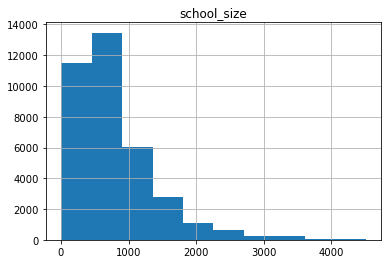

In [24]:
# Plot and see how school_size is distributed:

df.hist(column = 'school_size')
plt.show()

In [25]:
## Help: check how a method works and what parameters it needs
# df.hist?

#### 5. Editing column values

In [26]:
df.school_location.unique()

array(['A city (100 000 to about 1 000 000 people)',
       'A town (15 000 to about 100 000 people)',
       'A small town (3 000 to about 15 000 people)',
       'A large city (with over 1 000 000 people)', None,
       'A village, hamlet or rural area (fewer than 3 000 people)'],
      dtype=object)

In [27]:
# See how this works:
string_school_location = "school location type (description)"

string_school_location.split('(')[0]

'school location type '

In [28]:
string_school_location.split('(')[0][:-1]

'school location type'

In [29]:
# What is this code structure called? Practice it as homework.

[string.split('(')[0][:-1] for string in df.school_location if string!= None][:5]

['A city', 'A city', 'A city', 'A city', 'A city']

In [30]:
# Reassign to new column: 

df["location"] = [string.split('(')[0][:-1] if string!= None else None for string in df.school_location]

In [31]:
# Check how it worked: 

df[["school_location","location"]].sample(5)

,school_location,location
49937,A city (100 000 to about 1 000 000 people),A city
19965,A town (15 000 to about 100 000 people),A town
41970,A town (15 000 to about 100 000 people),A town
13998,A town (15 000 to about 100 000 people),A town
10374,A town (15 000 to about 100 000 people),A town


#### 6. Mapping column values

In [32]:
# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

df["early_education"].value_counts()

Attended ECEC for at least two but less than three years      12395
Attended ECEC for at least three but less than four years     11279
Attended ECEC for at least four but less than five years       6811
Attended ECEC for at least one but less than two years         5162
Attended ECEC for at least five but less than six years        3113
Attended ECEC for less than a year                              438
Attended ECEC for at least six but less than seven years        429
Attended ECEC for at least seven but less than eight years       26
Attended ECEC for at least eight years                           11
Name: early_education, dtype: int64

In [33]:
# Mapping column values: 

early_ed = {'No Response': None,
            'Attended ECEC for less than a year': 0,
            'Attended ECEC for at least one but less than two years': 1,
            'Attended ECEC for at least two but less than three years': 2,
            'Attended ECEC for at least three but less than four years': 3,
            'Attended ECEC for at least four but less than five years': 4,
            'Attended ECEC for at least five but less than six years': 5,
            'Attended ECEC for at least six but less than seven years': 6,
            'Attended ECEC for at least seven but less than eight years': 7,
            'Attended ECEC for at least eight years': 8}

df["ECEC_limit"] = df.early_education.map(early_ed)

In [34]:
# After mapping values to the new column:

df["ECEC_limit"].value_counts()

2.0    12395
3.0    11279
4.0     6811
1.0     5162
5.0     3113
0.0      438
6.0      429
7.0       26
8.0       11
Name: ECEC_limit, dtype: int64

#### 7. Summarize values with `groupby()`
A `groupby()` operation carries out some combination of splitting the data, performing an operation, and combining the results:

* state the Series you want to group by.
* append the operation you want to perform such as .mean(), .sum() or .count()

In [35]:
df_country_m_f = df.groupby(["country", "student_gender"])[["math_score","reading_score"]].median().reset_index()

In [36]:
df_country_m_f

,country,student_gender,math_score,reading_score
0,Argentina,Female,379.999605,423.397460
1,Argentina,Male,400.012300,409.711000
2,Finland,Female,515.323700,553.570130
3,Finland,Male,507.821010,500.784910
4,Japan,Female,525.601345,515.985595
5,Japan,Male,536.411990,499.877410
6,Netherlands,Female,518.592620,497.670090
7,Netherlands,Male,517.775330,464.479310
8,New Zealand,Female,492.636595,527.040530
9,New Zealand,Male,502.882290,499.501190


#### 8. Sort values

In [37]:
df_country_m_f.sort_values(by="math_score", ascending=False)

,country,student_gender,math_score,reading_score
5,Japan,Male,536.411990,499.877410
4,Japan,Female,525.601345,515.985595
6,Netherlands,Female,518.592620,497.670090
7,Netherlands,Male,517.775330,464.479310
2,Finland,Female,515.323700,553.570130
3,Finland,Male,507.821010,500.784910
10,Norway,Female,505.222045,527.865600
9,New Zealand,Male,502.882290,499.501190
11,Norway,Male,499.103000,479.519710
8,New Zealand,Female,492.636595,527.040530


#### 9. Visualization using seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Learn more at: https://seaborn.pydata.org/

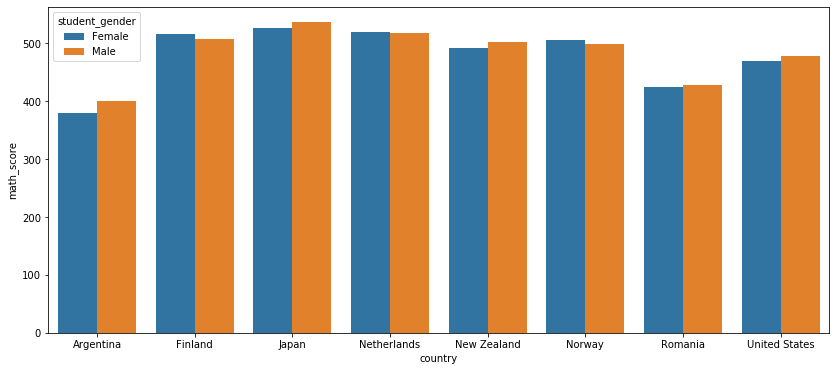

In [38]:
# Bar chart:

f, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x="country", 
           y="math_score", 
           hue = 'student_gender',
           data = df_country_m_f)
plt.show()

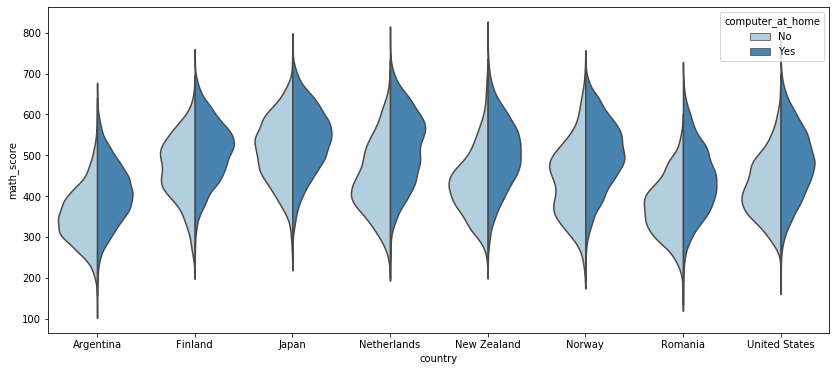

In [39]:
# violinplot
f, ax = plt.subplots(figsize=(14, 6))

sns.violinplot(x="country", 
               y="math_score", 
               hue = 'computer_at_home',
               data = df, 
               palette = "Blues",
               split = True,
               inner = None) # or, None, or "box", or "quartile"
plt.show()

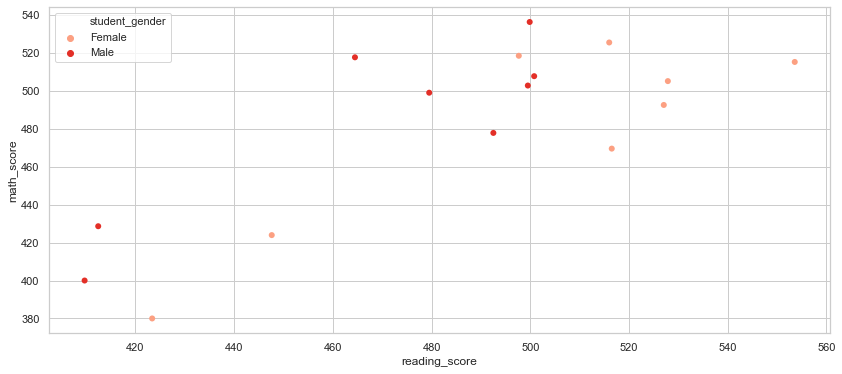

In [40]:
# Scatterplot

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6))

sns.scatterplot(x="reading_score", 
                y="math_score",
                palette="Reds",
                linewidth=0,
                data=df_country_m_f,
                hue = "student_gender",
                ax=ax)
plt.show()

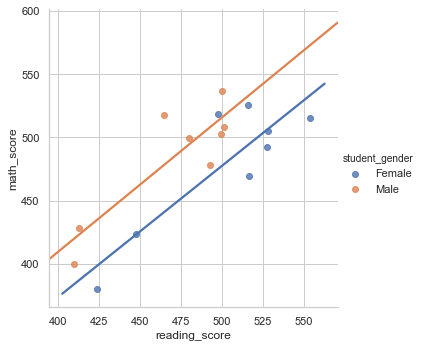

In [41]:
# Fitting a line through the points

sns.lmplot(x="reading_score", 
           y="math_score", 
           data=df_country_m_f, 
           hue="student_gender", 
           ci=None)
plt.show()

# Saving the plot

# plt.savefig('scatterplot.png', dpi=400, bbox_inches='tight')

### Merging dataframes:

In [42]:
# Load a dataset with country names, country codes, and latitude / longitude:

countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'

countries = pd.read_csv(countries_url)

In [43]:
countries.sample(5)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
25,si,SI,eu,Slovenia,Slovénie,Slowenien,46.149259,14.986617
5,cz,CZ,eu,Czech Republic,République tchèque,Tschechische Republik,49.803531,15.474998
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
9,fr,FR,eu,France,France,Frankreich,46.710994,1.718561


In [44]:
# We have already seen how to rename column names

countries.rename(columns={"country":"iso2:", "name_en":"country"}, inplace=True)

In [45]:
# We have also used .groupby() to get aggregates
# Use .groupby() to create new dataframe for country-level median math scores:

country_math_median = df.groupby("country")["math_score"].median().reset_index()
country_math_median

,country,math_score
0,Argentina,389.339290
1,Finland,512.057620
2,Japan,530.469790
3,Netherlands,518.278020
4,New Zealand,497.699710
5,Norway,502.040590
6,Romania,426.552610
7,United States,473.907545


In [46]:
# Homework: Look up documentation on options to merge and concantenate datasets:
# pd.merge?
# pd.concat?

In [47]:
# NOTE: The 'countries' dataframe only lists countries in Europe

# Experiment with how = 'inner' and how = 'right' to understand how pd.merge works

combined = pd.merge(country_math_median, countries, on='country', how='left') 
combined

,country,math_score,iso2:,google_country_code,country_group,name_fr,name_de,latitude,longitude
0,Argentina,389.339290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Finland,512.057620,fi,FI,eu,Finlande,Finnland,64.950159,26.067564
2,Japan,530.469790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Netherlands,518.278020,nl,NL,eu,Pays-Bas,Niederlande,52.108118,5.330198
4,New Zealand,497.699710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Norway,502.040590,no,NO,non-eu,Norvège,Norwegen,64.556460,12.665766
6,Romania,426.552610,ro,RO,eu,Roumanie,Rumänien,45.942611,24.990152
7,United States,473.907545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
